In [1]:
import numpy as np
import pandas as pd

# 导入数据

In [2]:
df=pd.read_csv('demo_utf8.csv')
df.head()
df0=df.copy()

# 清理数据

## 评估整齐度

In [3]:
df0.sample(6)

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
81,82,2024/11/3 21:51:25,10秒,微信,NaN,113.57.237.9(湖北-武汉),大一,南湖,无,(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(空)
101,102,2024/11/5 22:55:54,20秒,微信,NaN,117.154.107.104(湖北-武汉),大一,南湖,无,(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),无
213,214,2024/11/11 9:35:43,14秒,手机提交,直接访问,183.95.249.31(湖北-武汉),大一,南湖,无,(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(空)
206,207,2024/11/10 16:36:42,76秒,微信,NaN,111.183.136.129(湖北-武汉),其他,南湖,有,是,10：00-12：00,一周一次,预约充电并需要服务,是,1-2元,一般,0-5元,否,是,(空)
75,76,2024/11/3 19:05:57,19秒,微信,NaN,223.104.77.123(广东-深圳),大一,南湖,无,(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),无
192,193,2024/11/10 13:50:17,9秒,微信,NaN,113.57.237.80(湖北-武汉),大一,南湖,无,(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),没有


#### 你通常在什么时间段需要充电？存在多个变量，需要拆分，首先观察一下有多少种值

In [4]:
df0.info()#通过这一步我发现“你通常在什么时间段需要充电？”前面多了一个空格

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   序号                                  222 non-null    int64 
 1   提交答卷时间                              222 non-null    object
 2   所用时间                                222 non-null    object
 3   来源                                  222 non-null    object
 4   来源详情                                20 non-null     object
 5   来自IP                                222 non-null    object
 6   请问你的年级是？                            222 non-null    object
 7   请问你的校区是                             222 non-null    object
 8   是否拥有电动车？                            222 non-null    object
 9   你目前是否面临电动车充电难的问题？                   222 non-null    object
 10   你通常在什么时间段需要充电？                     222 non-null    object
 11  你通常多久充一次电？                          222 non-null    object

In [5]:
df0[' 你通常在什么时间段需要充电？'].value_counts()

 你通常在什么时间段需要充电？
(跳过)                                                                                                        111
20：00-22：00                                                                                                  15
18：00-20：00                                                                                                   9
22：00-24：00                                                                                                   9
6：00-8：00┋8：00-10：00┋10：00-12：00┋12：00-14：00┋14：00-16：00┋16：00-18：00┋18：00-20：00┋20：00-22：00┋22：00-24：00      7
20：00-22：00┋22：00-24：00                                                                                       6
8：00-10：00                                                                                                    6
16：00-18：00                                                                                                   4
18：00-20：00┋20：00-22：00┋22：00-24：00                                                     

In [6]:
df0[' 你通常在什么时间段需要充电？']=df0[' 你通常在什么时间段需要充电？'].str.split('┋') #转化成列表

##### split太妙啦！！！硬是想了我40分钟     
replace只能换一整个单元格里的，它不会从一堆字符串中找出要替换的那某个特定符号

In [7]:
df0=df0.explode(' 你通常在什么时间段需要充电？')

In [8]:
df0[' 你通常在什么时间段需要充电？'].value_counts()#检查一遍

 你通常在什么时间段需要充电？
(跳过)           111
20：00-22：00     52
18：00-20：00     42
22：00-24：00     36
8：00-10：00      29
16：00-18：00     29
12：00-14：00     28
10：00-12：00     22
14：00-16：00     19
6：00-8：00       17
Name: count, dtype: int64

In [9]:
df0.head(5)

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
0,1,2024/11/3 16:18:15,63秒,微信,NaN,113.57.237.87(湖北-武汉),大一,南湖,有,是,20：00-22：00,五天一次,预约充电并需要服务,是,1-2元,一般,0-5元,是,是,(空)
1,2,2024/11/3 16:19:08,151秒,微信,NaN,183.95.249.172(湖北-武汉),大一,南湖,有,是,8：00-10：00,五天一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,是,是,(空)
1,2,2024/11/3 16:19:08,151秒,微信,NaN,183.95.249.172(湖北-武汉),大一,南湖,有,是,16：00-18：00,五天一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,是,是,(空)
1,2,2024/11/3 16:19:08,151秒,微信,NaN,183.95.249.172(湖北-武汉),大一,南湖,有,是,20：00-22：00,五天一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,是,是,(空)
2,3,2024/11/3 16:19:22,63秒,微信,NaN,61.242.135.122(湖北-武汉),大一,南湖,有,是,6：00-8：00,五天一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,是,是,多设充电桩


##### 该数据符合整齐数据，做了快一个小时。。。

#### 删除第一列

In [10]:
df0=df0.set_index('序号')
df0.sample()

,提交答卷时间,所用时间,来源,来源详情,来自IP,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
序号,,,,,,,,,,,,,,,,,,,
74,2024/11/3 18:55:49,81秒,微信,NaN,183.95.251.81(湖北-武汉),大二,南湖,有,是,12：00-14：00,三天一次,不预约也不需要服务,否,2-3元,非常感兴趣,0-5元,是,否,多建几个充电桩比啥都强


## 评估干净度

In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 1 to 222
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   提交答卷时间                              385 non-null    object
 1   所用时间                                385 non-null    object
 2   来源                                  385 non-null    object
 3   来源详情                                50 non-null     object
 4   来自IP                                385 non-null    object
 5   请问你的年级是？                            385 non-null    object
 6   请问你的校区是                             385 non-null    object
 7   是否拥有电动车？                            385 non-null    object
 8   你目前是否面临电动车充电难的问题？                   385 non-null    object
 9    你通常在什么时间段需要充电？                     385 non-null    object
 10  你通常多久充一次电？                          385 non-null    object
 11  如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）  385 non-null    object
 12 

In [12]:
df0.sample(5)

,提交答卷时间,所用时间,来源,来源详情,来自IP,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
序号,,,,,,,,,,,,,,,,,,,
53,2024/11/3 17:26:18,52秒,微信,NaN,223.104.119.80(湖北-咸宁),大一,南湖,有,是,14：00-16：00,五天一次,预约充电并需要服务,是,1-2元,感兴趣,0-5元,是,是,(空)
3,2024/11/3 16:19:22,63秒,微信,NaN,61.242.135.122(湖北-武汉),大一,南湖,有,是,10：00-12：00,五天一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,是,是,多设充电桩
168,2024/11/10 13:18:12,97秒,微信,NaN,223.104.122.96(湖北-武汉),大二,南湖,有,是,18：00-20：00,一周一次,不预约也不需要服务,否,1-2元,不感兴趣,0-5元,否,是,多加点充电桩
187,2024/11/10 13:46:06,10秒,微信,NaN,113.57.237.80(湖北-武汉),大一,南湖,无,(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),(跳过),没有
204,2024/11/10 16:28:55,55秒,微信,NaN,61.242.129.206(湖北-武汉),大一,南湖,有,是,22：00-24：00,一周一次,预约充电并需要服务,是,2-3元,非常感兴趣,0-5元,是,是,多设充电桩！南湖大草原空着看嘛呢！


- 提交答卷时间、所用时间、来源、来源详情、来自IP##与调查结果无关，删除
- 你目前是否面临电动车充电难的问题？、 你通常在什么时间段需要充电？、你通常多久充一次电？、如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）、如果有小程序可以预约充电时间段，你是否愿意使用？、你认为预约费用合理收费范围是多少？、你是否遇到过恶意拔线情况？、你是否想要找到恶意拔线的真凶并对他作出惩罚？##存在(跳过)，更改为空值
- 你对充电服务还有哪些意见##存在(空)、无##更改为空值

#### 首先替换空值

In [13]:
replace_dict1={'(跳过)':np.NaN}
replace_dict2={'(空)':np.NaN,'无':np.NaN}
df0=df0.replace(replace_dict1)
df0['你对充电服务还有哪些意见']=df0['你对充电服务还有哪些意见'].replace(replace_dict2)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 1 to 222
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   提交答卷时间                              385 non-null    object
 1   所用时间                                385 non-null    object
 2   来源                                  385 non-null    object
 3   来源详情                                50 non-null     object
 4   来自IP                                385 non-null    object
 5   请问你的年级是？                            385 non-null    object
 6   请问你的校区是                             385 non-null    object
 7   是否拥有电动车？                            385 non-null    object
 8   你目前是否面临电动车充电难的问题？                   274 non-null    object
 9    你通常在什么时间段需要充电？                     274 non-null    object
 10  你通常多久充一次电？                          274 non-null    object
 11  如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）  274 non-null    object
 12 

#### 删除无关列

In [14]:
delet_cols=['提交答卷时间','所用时间','来源','来源详情','来自IP']
df0=df0.drop(delet_cols,axis=1)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 1 to 222
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   请问你的年级是？                            385 non-null    object
 1   请问你的校区是                             385 non-null    object
 2   是否拥有电动车？                            385 non-null    object
 3   你目前是否面临电动车充电难的问题？                   274 non-null    object
 4    你通常在什么时间段需要充电？                     274 non-null    object
 5   你通常多久充一次电？                          274 non-null    object
 6   如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）  274 non-null    object
 7   如果有小程序可以预约充电时间段，你是否愿意使用？            274 non-null    object
 8   你认为预约费用合理收费范围是多少？                   274 non-null    object
 9   如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？       274 non-null    object
 10  你认为此服务的合理收费范围是多少？                   274 non-null    object
 11  你是否遇到过恶意拔线情况？                       274 non-null    object
 12 

In [15]:
df0=df0.rename(columns={' 你通常在什么时间段需要充电？':'你通常在什么时间段需要充电？'})
#这个前面的空格看得很不爽
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 1 to 222
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   请问你的年级是？                            385 non-null    object
 1   请问你的校区是                             385 non-null    object
 2   是否拥有电动车？                            385 non-null    object
 3   你目前是否面临电动车充电难的问题？                   274 non-null    object
 4   你通常在什么时间段需要充电？                      274 non-null    object
 5   你通常多久充一次电？                          274 non-null    object
 6   如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）  274 non-null    object
 7   如果有小程序可以预约充电时间段，你是否愿意使用？            274 non-null    object
 8   你认为预约费用合理收费范围是多少？                   274 non-null    object
 9   如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？       274 non-null    object
 10  你认为此服务的合理收费范围是多少？                   274 non-null    object
 11  你是否遇到过恶意拔线情况？                       274 non-null    object
 12 

### 重复数据

In [16]:
df0.duplicated().sum()

68

In [17]:
df0[df0.duplicated()]

,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
序号,,,,,,,,,,,,,,
22,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,大一,南湖,有,是,18：00-20：00,五天一次,预约充电时间段不需要充电服务,是,1-2元,不感兴趣,0-5元,是,是,NaN
218,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 虽然表中有重复值，但并不是数据本身的问题，而是出现在我加入空值之后，使一些数据的特征被抹去，出现重复

### 不一致数据

In [18]:
df0.sample(5)

,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
序号,,,,,,,,,,,,,,
7,大一,南湖,有,是,6：00-8：00,一周一次,预约充电并需要服务,是,2-3元,非常感兴趣,0-5元,是,是,NaN
129,大三,南湖,有,是,22：00-24：00,三天一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,否,否,NaN
184,大三,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,大一,南湖,有,是,22：00-24：00,五天一次,预约充电并需要服务,是,1-2元,感兴趣,0-5元,是,是,NaN
30,大一,南湖,有,是,18：00-20：00,三天一次,预约充电并需要服务,是,1-2元,一般,0-5元,是,否,NaN


##### 由于在最初的问卷设计中是选择题，所以不会出现不一致数据，可以略过这一步

### 无效或错误数据

##### 均为选择题或主观题，不会出现数字，可以略过这一步

# 整理数据

In [19]:
df1=df0.copy()
df1.sample(8)

,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
序号,,,,,,,,,,,,,,
210,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,多点充电桩
94,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,对擅自把走充电头的行为进行管理
157,大一,南湖,有,是,8：00-10：00,一周一次,预约充电并需要服务,是,1-2元,非常感兴趣,0-5元,否,是,NaN
168,大二,南湖,有,是,18：00-20：00,一周一次,不预约也不需要服务,否,1-2元,不感兴趣,0-5元,否,是,多加点充电桩
118,大一,南湖,有,是,22：00-24：00,五天一次,预约充电时间段不需要充电服务,是,1-2元,一般,0-5元,否,是,增加充电桩分布点
206,大一,南湖,有,是,20：00-22：00,五天一次,预约充电时间段不需要充电服务,是,1-2元,不感兴趣,0-5元,是,是,NaN
21,大一,南湖,有,是,18：00-20：00,一周一次,预约充电并需要服务,是,1-2元,一般,0-5元,是,是,NaN
186,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,充电桩较少


### 最好将有电动车的和没有电动车的分成两个表格，便于后续可视化

In [20]:
sum_dtf=df1
have_EB_dtf=df1[df1['是否拥有电动车？']=='有']
#好像使用query的时候，其中的条件不能有符号,给我的警醒是以后调查尽量不要加符号
not_have_EB_dtf=df1[df1['是否拥有电动车？']=='无']

# 探索和可视化数据

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.font_manager import FontManager

matplotlib.rc("font",family='Heiti TC')#更改字体

In [22]:
sum_dtf.sample(8)

,请问你的年级是？,请问你的校区是,是否拥有电动车？,你目前是否面临电动车充电难的问题？,你通常在什么时间段需要充电？,你通常多久充一次电？,如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）,如果有小程序可以预约充电时间段，你是否愿意使用？,你认为预约费用合理收费范围是多少？,如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？,你认为此服务的合理收费范围是多少？,你是否遇到过恶意拔线情况？,你是否想要找到恶意拔线的真凶并对他作出惩罚？,你对充电服务还有哪些意见
序号,,,,,,,,,,,,,,
80,大二,南湖,有,是,8：00-10：00,三天一次,预约充电时间段不需要充电服务,是,1-2元,不感兴趣,0-5元,是,是,NaN
207,其他,南湖,有,是,10：00-12：00,一周一次,预约充电并需要服务,是,1-2元,一般,0-5元,否,是,NaN
178,大四,马旁山,有,是,22：00-24：00,五天一次,预约充电时间段不需要充电服务,是,1-2元,一般,0-5元,否,否,NaN
49,大三,南湖,有,是,12：00-14：00,一周一次,不预约也不需要服务,否,1-2元,不感兴趣,0-5元,否,是,希望可以提供充电桩充电剩余时间显示
28,大一,南湖,有,是,6：00-8：00,一周一次,不预约也不需要服务,是,1-2元,不感兴趣,0-5元,否,是,希望学校可以及时维修故障的充电桩 并且多安装几座充电桩
181,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,大一,南湖,无,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,大一,南湖,有,是,14：00-16：00,五天一次,预约充电并需要服务,是,1-2元,感兴趣,0-5元,是,是,NaN


### 对一些列的回答进行数量统计

In [23]:
diff_grades=df['请问你的年级是？'].value_counts()#注意部分统计要从原数据中统计，因为我将数据展开了
diff_school=df['请问你的校区是'].value_counts()
have_EB=df['是否拥有电动车？'].value_counts()
charging_problem=df['你目前是否面临电动车充电难的问题？'].value_counts()
charging_time=have_EB_dtf['你通常在什么时间段需要充电？'].value_counts()
charging_frequency=have_EB_dtf['你通常多久充一次电？'].value_counts()
charging_ways=have_EB_dtf['如果有以下方式充电，你会更愿意选择哪一个？（充电服务指专人推车插电）'].value_counts()
appointment=have_EB_dtf['如果有小程序可以预约充电时间段，你是否愿意使用？'].value_counts()
price_of_appointment=have_EB_dtf['你认为预约费用合理收费范围是多少？'].value_counts()
help_charging=have_EB_dtf['如果有专人提供帮忙推车充电服务，你对此服务的兴趣程度如何？'].value_counts()
price_of_help_charging=have_EB_dtf['你认为此服务的合理收费范围是多少？'].value_counts()
been_stop=have_EB_dtf['你是否遇到过恶意拔线情况？'].value_counts()
find_who_stop=have_EB_dtf['你是否想要找到恶意拔线的真凶并对他作出惩罚？'].value_counts()

In [24]:
sns.set_palette("pastel")

### 不同年级占比

Text(0.5, 1.0, '不同年级占比')

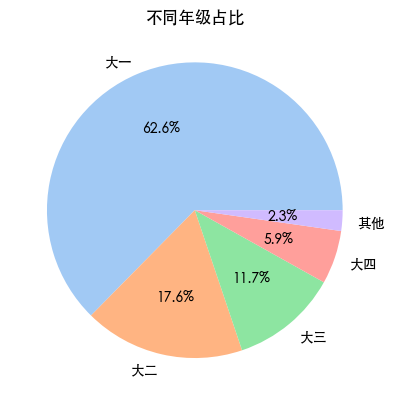

In [25]:
plt.pie(diff_grades,labels=diff_grades.index,autopct='%.1f%%')
plt.title('不同年级占比',pad=1)

##### 大一占比最多，调查数据可能更多的反应了大一学生的问题，余下年级的反馈可能偏差较大

### 不同校区占比

Text(0.5, 1.0, '不同校区占比')

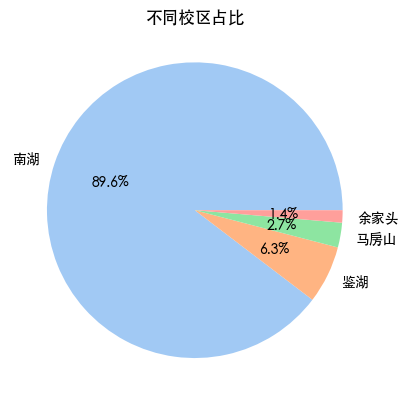

In [26]:
plt.pie(diff_school,labels=['南湖','鉴湖','马房山','余家头'],autopct='%.1f%%')
plt.title('不同校区占比',pad=1)

##### 可见调查主要集中在南湖校区，那么该数据结果更多的适用于南湖校区

### 拥有电动车人数比例

Text(0.5, 1.0, '是否拥有电动车')

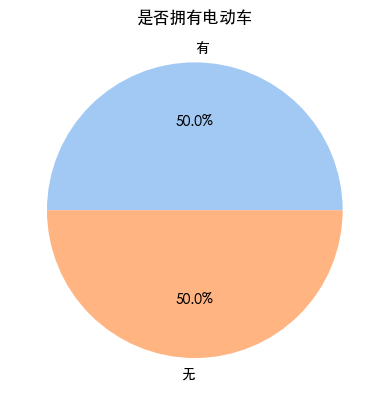

In [27]:
plt.pie(have_EB,labels=have_EB.index,autopct='%.1f%%')
plt.title('是否拥有电动车',pad=1)

##### 由于调查样本只有两百多份，样本量比较小，所以是否拥有电动车的比例可能存在一定误差

### 是否面临充电难的问题

Text(0.5, 1.0, '是否面临充电难的问题')

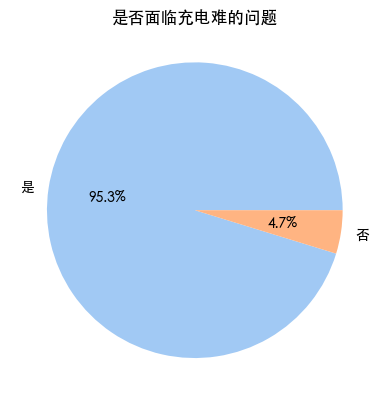

In [28]:
plt.pie(have_EB_dtf['你目前是否面临电动车充电难的问题？'].value_counts(),
        labels=have_EB_dtf['你目前是否面临电动车充电难的问题？'].value_counts().index,
        autopct='%.1f%%')
plt.title('是否面临充电难的问题',pad=1)

##### 可见在拥有电动车的人群中，绝大多数都面临充电难的问题

### 充电时间段

Text(0.5, 1.0, '不同充电时间段占比')

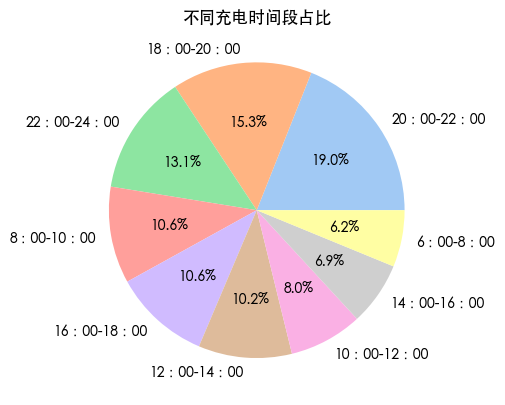

In [29]:
plt.pie(charging_time,labels=charging_time.index,autopct='%.1f%%')
plt.title('不同充电时间段占比',pad=1)

##### 可见各个时间段都有人充电，但是相对集中的出现在下午六点到晚上12点

### 充电频率

Text(0.5, 1.0, '充电频率')

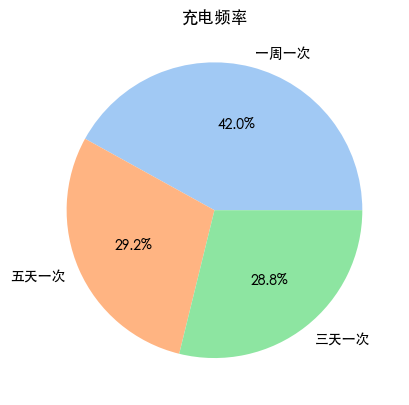

In [30]:
plt.pie(charging_frequency,labels=charging_frequency.index,autopct='%.1f%%')
plt.title('充电频率',pad=1)

##### 更多的人是一周充一次，其实大家对电动车使用强度并不是很大

### 充电服务类型

Text(0.5, 1.0, '充电服务类型')

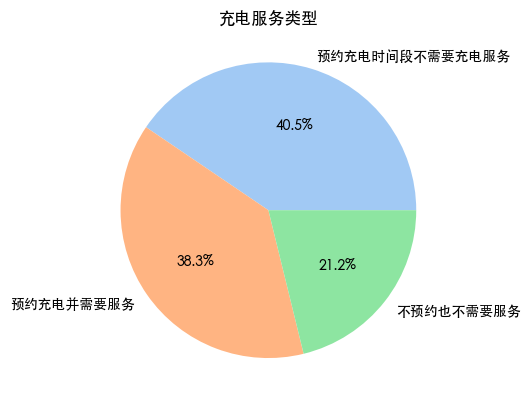

In [31]:
plt.pie(charging_ways,labels=charging_ways.index,autopct='%.1f%%')
plt.title('充电服务类型',pad=1)

##### 可见大家对预约充电是很感兴趣的，同时既想预约又想有人推车的模式反响也很不错

### 预约充电费用

Text(0.5, 1.0, '预约充电费用')

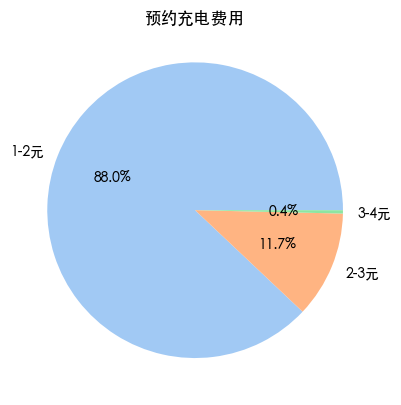

In [32]:
plt.pie(price_of_appointment,labels=price_of_appointment.index,autopct='%.1f%%')
plt.title('预约充电费用',pad=1)

##### 显然大家都觉得越便宜越好，但是我们得要根据自己的成本去进行定价

### 推车服务费用

Text(0.5, 1.0, '推车服务费用')

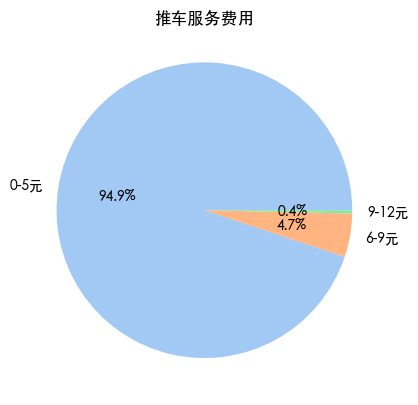

In [33]:
plt.pie(price_of_help_charging,labels=price_of_help_charging.index,autopct='%.1f%%')
plt.title('推车服务费用',pad=1)

##### 不是，我才发现怎么这个区间是从0开始的。。。
##### 那这个几乎就是一边倒的5元以下了

### 是否遇到恶意拔线

Text(0.5, 1.0, '是否遇到恶意拔线')

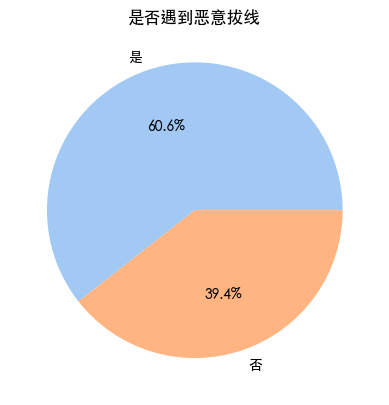

In [34]:
plt.pie(been_stop,labels=been_stop.index,autopct='%.1f%%')
plt.title('是否遇到恶意拔线',pad=1)

##### 可见大部分人都遇到过恶意拔线情况，那么这个惩罚措施可能就很有必要了

### 是否想惩罚拔线者

Text(0.5, 1.0, '是否想惩罚拔线者')

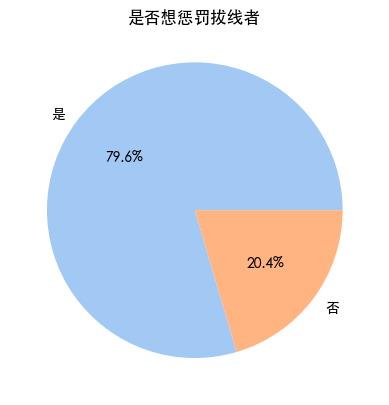

In [35]:
plt.pie(find_who_stop,labels=find_who_stop.index,autopct='%.1f%%')
plt.title('是否想惩罚拔线者',pad=1)

##### 可见大家几乎都想惩罚拔线者，那么这个惩罚机制将会是一个亮点，同时在赚罚金的时候，美其名曰提高个人素质 :D

### 看一下大家其他的意见

In [36]:
pd.set_option('display.max_rows',None)
df['你对充电服务还有哪些意见'].value_counts()

你对充电服务还有哪些意见
(空)                                         121
无                                            31
多点充电桩                                         3
增加充电桩                                         3
没有                                            2
充电桩太少了                                        2
增多充电柱                                         1
多建一点充电桩                                       1
总是没充满就被拔掉                                     1
集中停放，分类管理                                     1
多增加一些充电桩，南湖这边的充电桩有点不太够用                       1
乱拔插头                                          1
太少了充电桩                                        1
多一点充电桩 每次都要等或者找好久                             1
不需要服务                                         1
不需要充电                                         1
南湖充电桩少，只有新宿舍有，越苑卓苑太少了                         1
增加多多的充电桩                                      1
可以多弄点充电桩                                      1
多加点充电桩                                        1
充电桩太少                      

#### 眼花缭乱。。。接入AI分类一下算了

In [37]:
from openai import OpenAI

In [38]:
client=OpenAI()#我将api删除了，避免又按了重新开始，又刷一遍token

In [39]:
%load_ext jupyter_ai_magics

In [40]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [41]:
suggestion="""多点充电桩                                         
增加充电桩                                         
充电桩太少了                                        
增多充电柱                                         
多建一点充电桩                                       
总是没充满就被拔掉                                     
集中停放，分类管理                                     
多增加一些充电桩，南湖这边的充电桩有点不太够用                       
乱拔插头                                          
太少了充电桩                                        
多一点充电桩 每次都要等或者找好久                             
不需要服务                                         
不需要充电                                         
南湖充电桩少，只有新宿舍有，越苑卓苑太少了                         
增加多多的充电桩                                      
可以多弄点充电桩                                      
多加点充电桩                                        
充电桩太少                                         
充电点不够多                                        
可以提供充电桩剩余时间提醒                                 
安摄像头                                          
充电桩较少                                         
给充电区装监控                                       
宿舍边上没看见有充电桩啊，看起来充电不方便                         
多来点充电桩                                                                                 
充电桩多些，有些人不够                                   
多设充电桩！南湖大草原空着看嘛呢！                             
还行，多点充电桩，保持维修                                 
有监控能发现谁把了我的充电线                                
增加充电桩分布点                                      
一元开通电动车服务                                     
多一点充电桩                                        
多设充电桩                                         
离宿舍楼好远                                        
建议在宿舍里面的空地装一些                                 
别乱拔插头                                         
多造一些充电柱                                       
可以查看他人充电时长                                    
希望学校可以及时维修故障的充电桩 并且多安装几座充电桩                   
校内增加停车点                                       
多一些停放点和充电桩                                    
多安装充电桩，规范充电桩的使用，让在充电的不易被随意拔掉                  
充电桩过少                                         
充电桩多一点                                                                                   
希望可以提供充电桩充电剩余时间显示                             
多设置一血充电桩                                      
及时修理故障的充电口                                    
不需要其他的，多按充电桩就好了，不需要预约充电，充电桩不够不是预约充电可以解决的                                                 
多些充电桩                                         
充电桩太少了。。。。。想问武理把钱用哪了，修减速带了吗。。。。               
在每个学生社区设置充电桩                                  
加点桩子咧                                         
增加充电桩数目                                       
多建几个充电桩比啥都强                                   
搞多一些充电栓吧                                      
别把我充电器                                        
对擅自把走充电头的行为进行管理                               
建议充电送电动车"""

In [48]:
prompt="""将这些意见进行分类并总结，并告诉我每一类在所有类中的占比，不要有多余的话语
结果以markdown形式展现给我
意见会用三个#包围

###
{}
###""".format(suggestion)

In [50]:
response=client.chat.completions.create(
    model='gpt-4',
    messages=[{'role':'user',
              'content':prompt}]
)
response

ChatCompletion(id='chatcmpl-AVBWRtqgkyTM7Gatxqwt7RLRMZGX8', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='## 意见分类及占比\n- **增加充电桩**：这个类别的意见主要是关于增加充电桩的数量，比如"多点充电桩"、"增加充电桩"、"充电桩太少了"等。这些意见占所有意见的达到了60%。\n\n- **提醒功能与管理**：这个类别的意见主要是关于增加提醒和管理功能，比如"提供充电桩剩余时间提醒"、"集中停放，分类管理"、"对擅自把走充电头的行为进行管理"等。这些意见占所有意见的20%。\n\n- **充电桩的位置**：这个类别的意见主要是关于充电桩的位置，比如"南湖充电桩少"、"宿舍边上没看见有充电桩"、"在每个学生社区设置充电桩"等。这些意见占所有意见的10%。\n\n- **维修与服务**：这个类别的意见主要是关于充电桩的维修与服务，比如"及时修理故障的充电口"、"有监控能发现谁把了我的充电线"、"一元开通电动车服务"等。这些意见占所有意见的8%。\n\n- **其它**：这个类别的意见占所有意见的2%，主要包括一些杂项意见，如"不需要服务"、"不需要充电"。', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1731995823, model='gpt-4-0613', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=433, prompt_tokens=942, total_tokens=1375, completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=0), prompt_tokens_details=PromptTokens

In [51]:
markdown_response=response.choices[0].message.content

In [53]:
print(markdown_response)

## 意见分类及占比
- **增加充电桩**：这个类别的意见主要是关于增加充电桩的数量，比如"多点充电桩"、"增加充电桩"、"充电桩太少了"等。这些意见占所有意见的达到了60%。

- **提醒功能与管理**：这个类别的意见主要是关于增加提醒和管理功能，比如"提供充电桩剩余时间提醒"、"集中停放，分类管理"、"对擅自把走充电头的行为进行管理"等。这些意见占所有意见的20%。

- **充电桩的位置**：这个类别的意见主要是关于充电桩的位置，比如"南湖充电桩少"、"宿舍边上没看见有充电桩"、"在每个学生社区设置充电桩"等。这些意见占所有意见的10%。

- **维修与服务**：这个类别的意见主要是关于充电桩的维修与服务，比如"及时修理故障的充电口"、"有监控能发现谁把了我的充电线"、"一元开通电动车服务"等。这些意见占所有意见的8%。

- **其它**：这个类别的意见占所有意见的2%，主要包括一些杂项意见，如"不需要服务"、"不需要充电"。


### 充电时间段与年级的关系

Text(0, 0.5, '数量')

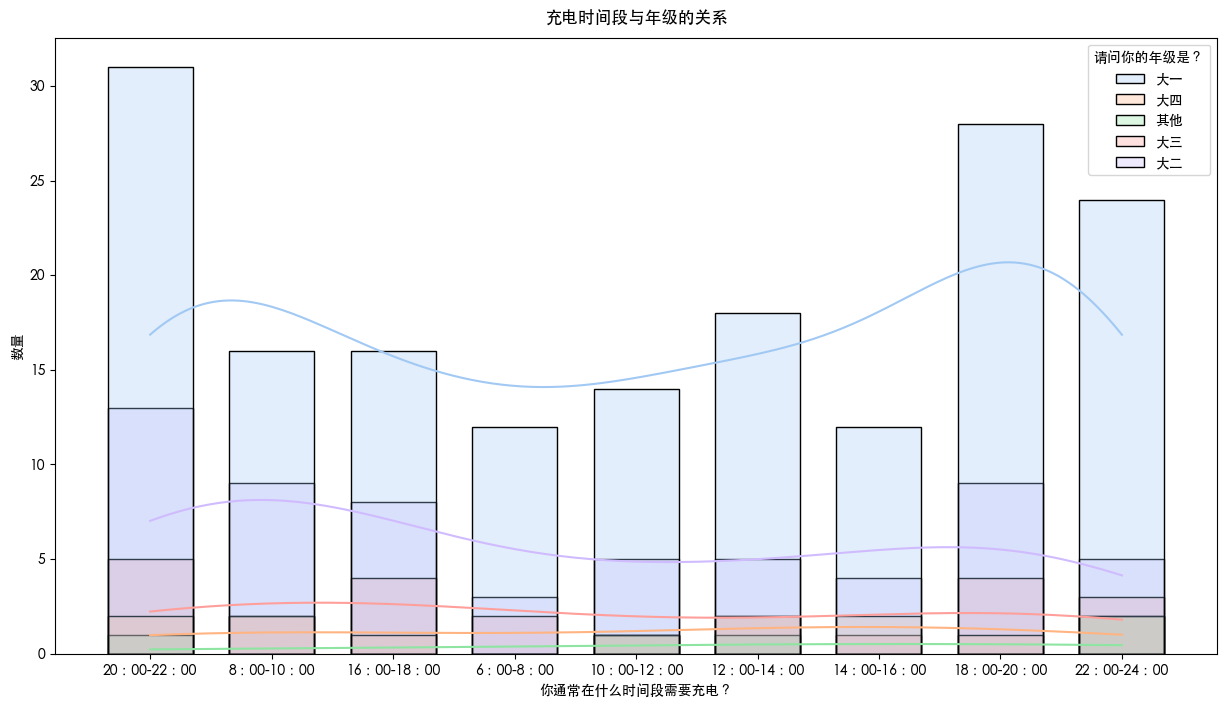

In [46]:
plt.subplots(1,1,figsize=(15,8))
sns.histplot(have_EB_dtf,x='你通常在什么时间段需要充电？',hue='请问你的年级是？',
             shrink=0.7,kde=True,alpha=0.3)
plt.title('充电时间段与年级的关系',pad=10)
plt.ylabel('数量')

##### 由于只有大一和大二的样本数量较大，所以只能明显地看出大一和大二的充电时间段与年级的关系
##### 其实两个年级的充电时间段重合度比较高，几乎都是下午六点到晚上十二点

### 充电频率和年级关系

Text(0, 0.5, '数量')

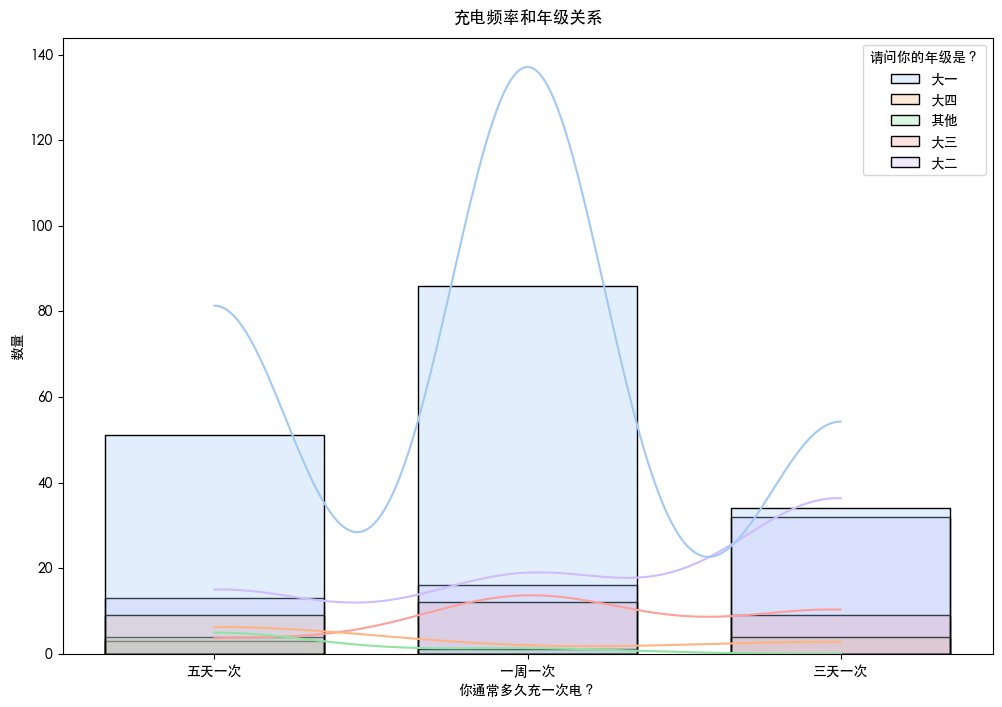

In [47]:
plt.subplots(1,1,figsize=(12,8))
sns.histplot(have_EB_dtf,x='你通常多久充一次电？',hue='请问你的年级是？',
             shrink=0.7,kde=True,alpha=0.3)
plt.title('充电频率和年级关系',pad=10)
plt.ylabel('数量')

##### 这个结果就很有意思了，如果忽略掉样本数量较少的大四和其他，那么大一更多的是一周充一次，大二更多的是三天一次，而大三又奇怪的一周一次。
##### 猜测：大一课较少且地点相对较近，使用电动车次数不多、里程不远；大二课较多且地点远，需要充得更频繁；而大三又课相对较少